In [2]:
import pandas as pd
adver_data = pd.read_csv('advertising.csv')

In [3]:
adver_data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
adver_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [5]:
data_values = adver_data[['TV', 'Radio', 'Newspaper']].to_numpy()

In [6]:
sales_values = adver_data['Sales'].to_numpy()

In [7]:
import numpy as np

In [8]:
means = np.mean(data_values, axis=0)

In [9]:
stds = np.std(data_values, axis=0)

In [10]:
X = (data_values - means) / stds

In [11]:
X = np.hstack([X, np.ones((X.shape[0],1))])

In [14]:
print(X[:5])

[[ 0.96985227  0.98152247  1.77894547  1.        ]
 [-1.19737623  1.08280781  0.66957876  1.        ]
 [-1.51615499  1.52846331  1.78354865  1.        ]
 [ 0.05204968  1.21785493  1.28640506  1.        ]
 [ 0.3941822  -0.84161366  1.28180188  1.        ]]


In [15]:
def mserror(y, y_pred):
    return round(sum((y - y_pred)**2)[0]/float(sales_values.shape[0]), 3)

In [16]:
sales_pred = np.array([np.median(sales_values)]*sales_values.shape[0]).reshape((sales_values.shape[0], 1))
answer1 = mserror(sales_values, sales_pred)
print(answer1)

84.64


In [17]:
def normal_equation(X, y):
    return np.dot(np.dot(np.linalg.pinv(np.dot(X.T, X)), X.T), y)

In [18]:
norm_eq_weights = normal_equation(X, sales_values)
print(norm_eq_weights)

[ 3.91925365  2.79206274 -0.02253861 14.0225    ]


In [19]:
def normal_equation_2(X, y):
    return np.dot(np.linalg.pinv(X), y)

In [20]:
norm_eq_weights_2 = np.array(normal_equation_2(X, sales_values))
print(norm_eq_weights_2)

[ 3.91925365  2.79206274 -0.02253861 14.0225    ]


In [21]:
answer2 = np.dot(np.mean(X, axis=0), norm_eq_weights_2)
print(answer2)

14.022499999999999


In [22]:
def linear_prediction(X, w):
    return np.dot(X, w)

In [23]:
y_values = linear_prediction(X, norm_eq_weights)
y_clean = y_values.reshape(y_values.shape[0], 1)

In [24]:
answer3 = mserror(sales_values, y_clean)
print(answer3)

89.548


In [25]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    x_k = X[train_ind, :]
    y_k = y[train_ind]
    y_pred = np.dot(x_k, w)
    l = X.shape[0]
    return w + (2*eta/l)*(y_k - y_pred)*x_k

In [26]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    weight_dist = np.inf
    w = w_init
    errors = []
    iter_num = 0
    np.random.seed(seed)
    while weight_dist > min_weight_dist and iter_num < max_iter:
        random_ind = np.random.randint(X.shape[0])
        old_w = w
        w = stochastic_gradient_step(X, y, w, random_ind, eta=eta)
        weight_dist = np.linalg.norm(w - old_w)
        errors.append(mserror(y, np.dot(X, w)))
        iter_num += 1
        
        if iter_num % 10000 == 0 and verbose:
            print("Iteration: ", iter_num) 
    return w, errors

In [27]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y_clean, np.ones((X.shape[1])), eta=1e-2, max_iter=10**5, verbose = True)

Iteration:  10000
Iteration:  20000
Iteration:  30000
Iteration:  40000
CPU times: total: 6.91 s
Wall time: 7.09 s


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

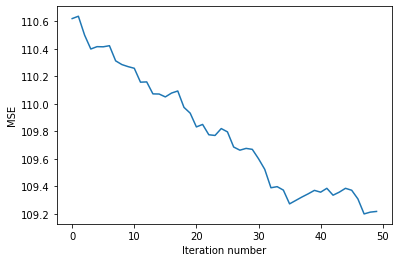

In [29]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

In [30]:
stoch_grad_desc_weights

array([ 3.88250368,  2.71657647,  0.06133787, 13.86598226])

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

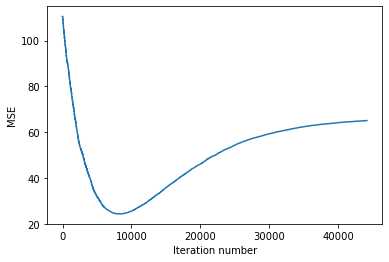

In [31]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

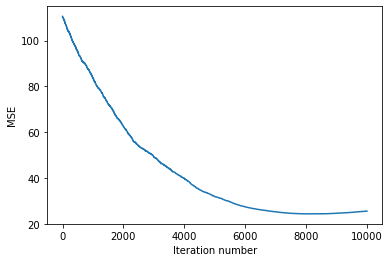

In [32]:
%pylab inline
plot(range(10000), stoch_errors_by_iter[:10000])
xlabel('Iteration number')
ylabel('MSE')

In [33]:
stoch_errors_by_iter[8000]

24.331

In [34]:
print(sum((sales_values - np.dot(X, stoch_grad_desc_weights).reshape((sales_values.shape[0], 1)))**2)/float(sales_values.shape[0]))
answer4 = round(np.mean((sales_values - np.dot(X, stoch_grad_desc_weights).reshape((sales_values.shape[0], 1)))**2), 3)
print(answer4)

10173.752413744822
50.869
